<a href="https://colab.research.google.com/github/GlubokovK/DL_CholletF_open/blob/master/main_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### загрузка и предобработка данных

In [26]:
from google.colab import files 
files.upload()

Saving object_word_train_set.json to object_word_train_set.json


{'object_word_train_set.json': b'[\r\n  [\r\n    [\r\n      "\\"",\r\n      0\r\n    ],\r\n    [\r\n      "\'\'",\r\n      1\r\n    ],\r\n    [\r\n      "(",\r\n      2\r\n    ],\r\n    [\r\n      ")",\r\n      3\r\n    ],\r\n    [\r\n      ",",\r\n      4\r\n    ],\r\n    [\r\n      "10",\r\n      5\r\n    ],\r\n    [\r\n      "12",\r\n      6\r\n    ],\r\n    [\r\n      "13.1",\r\n      7\r\n    ],\r\n    [\r\n      "1995",\r\n      8\r\n    ],\r\n    [\r\n      "1996",\r\n      9\r\n    ],\r\n    [\r\n      "2010",\r\n      10\r\n    ],\r\n    [\r\n      "225-\xd1\x84\xd0\xb7",\r\n      11\r\n    ],\r\n    [\r\n      "225-\xd1\x84\xd0\xb7\xd0\xb0",\r\n      11\r\n    ],\r\n    [\r\n      "225-\xd1\x84\xd0\xb7\xd1\x83",\r\n      11\r\n    ],\r\n    [\r\n      "225-\xd1\x84\xd0\xb7",\r\n      11\r\n    ],\r\n    [\r\n      "225-\xd1\x84\xd0\xb7\xd0\xbe\xd0\xbc",\r\n      11\r\n    ],\r\n    [\r\n      "225-\xd1\x84\xd0\xb7\xd0\xb5",\r\n      11\r\n    ],\r\n    [\r\n      "225-\xd1\x8

In [0]:
import json
file_path = 'object_word_train_set.json'
    
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

In [57]:
data[0][:10]

[['государственном', 37],
 ['на', 77],
 ['первого', 93],
 ['вёдших', 28],
 ['частных', 177],
 ['и', 52],
 ['выполняющей', 35],
 ['поупрощённее', 160],
 ['подразделения', 109],
 ['первых', 93]]

In [0]:
import random
random.shuffle(data[0])


In [53]:
word_set = [x[0] for x in data[0]]
label_set = [x[1] for x in data[0]]
index_dict = data[1]

N_fold = 4
i_fold = len(word_set) - int(len(word_set)/N_fold)

x_train = word_set[:i_fold]
y_train = label_set[:i_fold]

x_test = word_set[i_fold:]
y_test = label_set[i_fold:]



print('train: ', len(x_train))
print('test: ', len(x_test))


train:  3365
test:  1121


In [104]:
len(index_dict)

182

In [0]:
import string
characters = string.printable
characters = '0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZабвгдеёжзийклмнопрстуфхцчшщъыьэюяАБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'
token_index = dict(zip(characters, range(1, len(characters) + 1)))

In [67]:
len(token_index)

166

In [63]:
def to_one_hot(labels, index_dict):
    results = np.zeros((len(labels), len(index_dict)))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results


one_hot_y_train = to_one_hot(y_train, index_dict)
one_hot_y_test = to_one_hot(y_test, index_dict)
one_hot_y_train.shape

(3365, 182)

In [66]:
import numpy as np
max_length = 64


def word_to_one_hot(word_set, token_index, max_length = 64):
    
    results = np.zeros((len(word_set), 
                        max_length, 
                        max(token_index.values()) + 1
                       ))

    for i, word in enumerate(word_set):
        for j, character in enumerate(word):
            index = token_index.get(character)
            results[i, j, index] = 1.
            
    return results

one_hot_x_train = word_to_one_hot(x_train, token_index)
one_hot_x_test = word_to_one_hot(x_test, token_index)
one_hot_x_train.shape

(3365, 64, 167)

#### простая модель Dense

In [76]:
from keras import models
from keras import layers
from keras import layers
from keras import Input
from keras.models import Model

sh1 = one_hot_x_train.shape[1]
sh2 = one_hot_x_train.shape[2]

in_data = Input(shape=(sh1,sh2), dtype='float32')
x = layers.Flatten()(in_data)
x = layers.Dense(2048, activation='relu')(x)


ans = layers.Dense(len(index_dict), activation='softmax')(x)
    
model = Model(in_data,ans) 
  
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # auc

model.summary()


history = model.fit(one_hot_x_train, 
                    one_hot_y_train, 
                    epochs=20, 
                    batch_size=128, 
                    validation_split=0.2,
                    verbose=1
                   )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 64, 167)           0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 10688)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 2048)              21891072  
_________________________________________________________________
dense_11 (Dense)             (None, 182)               372918    
Total params: 22,263,990
Trainable params: 22,263,990
Non-trainable params: 0
_________________________________________________________________
Train on 2692 samples, validate on 673 samples
Epoch 1/20
2692/2692 [==============================] - 10s 4ms/step - loss: 2.7825 - acc: 0.6597 - val_loss: 1.3156 - val_acc: 0.8143
Epoch 2/20
2692/2692 [==============================] - 10s 4ms/step - loss: 0.8

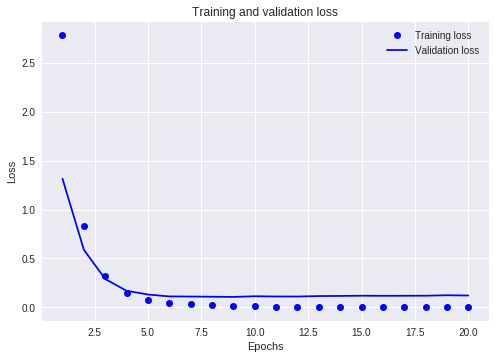

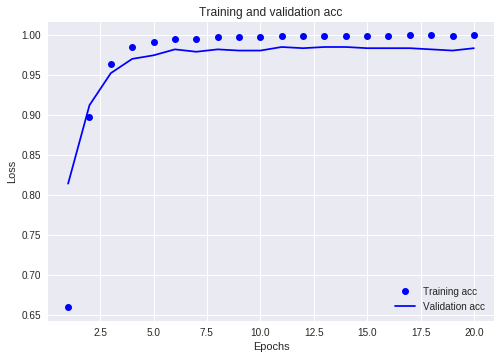

In [77]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
one_hot_y_pred = model.predict(one_hot_x_test)
print(np.argmax(predictions[0])) # Наибольший элемент, элемент с наибольшей вероятностью

15


In [108]:
predictions = [np.argmax(x) for x in one_hot_y_pred]
pred_max_score = [x[np.argmax(x)] for x in one_hot_y_pred]
print(predictions[:5])
print(pred_max_score[:5])

[15, 176, 17, 96, 139]
[0.9999989, 0.99999833, 0.9999943, 0.9778007, 1.0]


In [90]:
test_loss, test_acc = model.evaluate(one_hot_x_test, one_hot_y_test)
test_acc

1121/1121 [==============================] - 2s 2ms/step


0.983942908117752

In [110]:
import pandas as pd
df_pred=pd.DataFrame()
df_pred['x_test']=x_test
df_pred['y_test']=y_test
df_pred['pred']=predictions
df_pred['pred_max_score']=pred_max_score
df_pred['pred_word']=[index_dict[str(x)] for x in predictions]
df_pred['err']=df_pred['y_test']-df_pred['pred']

df_pred.head()
   

,x_test,y_test,pred,pred_max_score,pred_word,err
0,7-фзы,15,15,0.999999,7-фз,0
1,центральным,176,176,0.999998,центральный,0
2,агенте,17,17,0.999994,агент,0
3,их,96,96,0.977801,они,0
4,систематизированном,139,139,1.000000,систематизировать,0


In [113]:
print(len(predictions))
df_pred[df_pred['err']!=0].head(100)

1121


,x_test,y_test,pred,pred_max_score,pred_word,err
26,почастнее,177,74,0.683267,местный,103
64,него,94,95,0.877269,она,-1
131,ведётся,29,28,0.506893,вести,1
155,непрерывно,84,95,0.574897,она,-11
330,поиностраннее,60,108,0.523486,по,-48
362,12,6,5,0.574461,10,1
365,почастней,177,74,0.982109,местный,103
401,1995,8,5,0.747523,10,3
403,его,94,95,0.945661,она,-1
558,со,133,143,0.645745,создать,-10


#### Модель 2

In [114]:
from keras import models
from keras import layers
from keras import layers
from keras import Input
from keras.models import Model

sh1 = one_hot_x_train.shape[1]
sh2 = one_hot_x_train.shape[2]

in_data = Input(shape=(sh1,sh2), dtype='float32')
x = layers.Flatten()(in_data)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)


ans = layers.Dense(len(index_dict), activation='softmax')(x)
    
model = Model(in_data,ans) 
  
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']) # auc

model.summary()


history = model.fit(one_hot_x_train, 
                    one_hot_y_train, 
                    epochs=20, 
                    batch_size=128, 
                    validation_split=0.2,
                    verbose=1
                   )


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 64, 167)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10688)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              21891072  
_________________________________________________________________
dense_13 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_14 (Dense)             (None, 182)               23478     
Total params: 22,176,822
Trainable params: 22,176,822
Non-trainable params: 0
_________________________________________________________________
Train on 2692 samples, validate on 673 samples
Epoch 1/20
2692/2692 [==============================] - 12s 5ms/step - loss: 3.1294

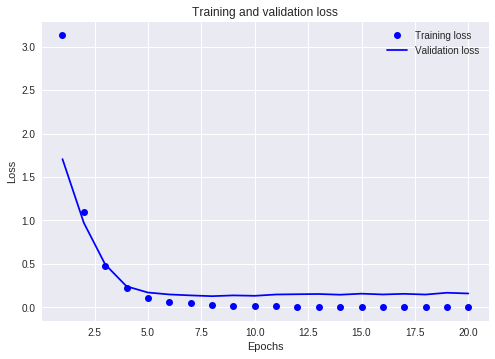

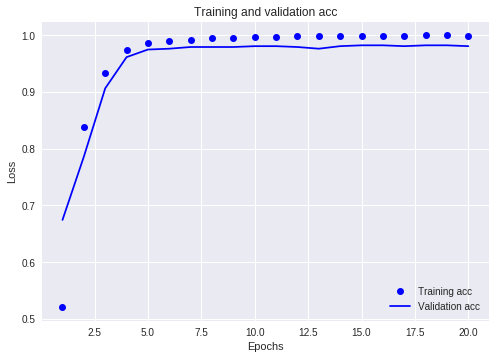

In [115]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [116]:
one_hot_y_pred = model.predict(one_hot_x_test)
print(np.argmax(predictions[0])) # Наибольший элемент, элемент с наибольшей вероятностью

0


In [117]:
predictions = [np.argmax(x) for x in one_hot_y_pred]
pred_max_score = [x[np.argmax(x)] for x in one_hot_y_pred]
print(predictions[:5])
print(pred_max_score[:5])

[15, 176, 17, 96, 139]
[0.9999974, 0.9999893, 0.9999937, 0.9992092, 1.0]


In [118]:
test_loss, test_acc = model.evaluate(one_hot_x_test, one_hot_y_test)
test_acc

1121/1121 [==============================] - 2s 1ms/step


0.9848349687778769

In [119]:
import pandas as pd
df_pred=pd.DataFrame()
df_pred['x_test']=x_test
df_pred['y_test']=y_test
df_pred['pred']=predictions
df_pred['pred_max_score']=pred_max_score
df_pred['pred_word']=[index_dict[str(x)] for x in predictions]
df_pred['err']=df_pred['y_test']-df_pred['pred']

df_pred.head()
   

,x_test,y_test,pred,pred_max_score,pred_word,err
0,7-фзы,15,15,0.999997,7-фз,0
1,центральным,176,176,0.999989,центральный,0
2,агенте,17,17,0.999994,агент,0
3,их,96,96,0.999209,они,0
4,систематизированном,139,139,1.000000,систематизировать,0


In [121]:
print(len(predictions))
df_pred[df_pred['err']!=0].head(100)

1121


,x_test,y_test,pred,pred_max_score,pred_word,err
26,почастнее,177,108,0.714300,по,69
64,него,94,95,0.973538,она,-1
155,непрерывно,84,96,0.367236,они,-12
204,ведя,28,29,0.461544,вестись,-1
330,поиностраннее,60,108,0.938019,по,-48
362,12,6,5,0.498419,10,1
365,почастней,177,74,0.821020,местный,103
401,1995,8,5,0.764757,10,3
403,его,94,95,0.715125,она,-1
558,со,133,143,0.818880,создать,-10


#### Выделим вектоное представление

In [122]:
model.layers

In [125]:

in_data = Input(shape=(sh1,sh2), dtype='float32')
#in_data = model.layers[0]()
x = model.layers[1](in_data)
x = model.layers[2](x)

ans = model.layers[3](x)


model2 = Model(in_data,ans) 

#model2.compile(optimizer=optimizers.RMSprop(lr=1e-4),
#                  loss='mse',
#                  metrics=['mse']) # auc

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 64, 167)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 10688)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              21891072  
_________________________________________________________________
dense_13 (Dense)             (None, 128)               262272    
Total params: 22,153,344
Trainable params: 22,153,344
Non-trainable params: 0
_________________________________________________________________


In [0]:
predictions = model2.predict(one_hot_x_test)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.010s...
[t-SNE] Computed neighbors for 1000 samples in 0.331s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 11.808784
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 69.3372345, gradient norm = 0.0278005 (50 iterations in 0.596s)
[t-SNE] Iteration 100: error = 68.4104004, gradient norm = 0.0148292 (50 iterations in 0.412s)
[t-SNE] Iteration 150: error = 68.2080765, gradient norm = 0.0042962 (50 iterations in 0.393s)
[t-SNE] Iteration 200: error = 68.1486511, gradient norm = 0.0025543 (50 iterations in 0.406s)
[t-SNE] Iteration 250: error = 68.1159821, gradient norm = 0.0022773 (50 iterations in 0.412s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.115982
[t-SNE] Iteration 300: error = 0.6704027, gradient norm = 0.0010847 (50 iterations in 0.325s)
[t-SNE] Iteration 350: error = 0.5420225, gradient norm = 0.0003

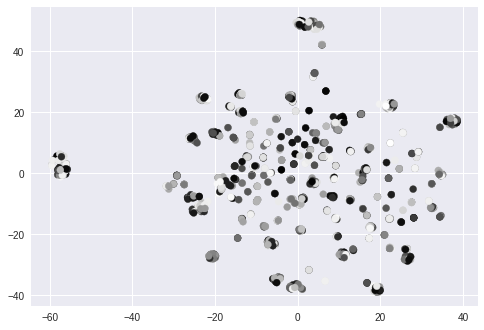

In [128]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
 

n = 1000
# Определяем модель и скорость обучения
model = TSNE(learning_rate=100, verbose=2)
 
# Обучаем модель
transformed = model.fit_transform(predictions[:n])
 
# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
 
plt.scatter(x_axis, y_axis, c=y_train[:n])
plt.show()